In [1]:
import numpy as np

def sigmoid(x):
        """
        Takes in weighted sum of the inputs and normalizes
        them through between 0 and 1 through a sigmoid function
        """
        return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    The derivative of the sigmoid function used to
    calculate necessary weight adjustments
    """
    return x * (1 - x)

np.random.seed(12)
synaptic_weights = 2 * np.random.random((3,1)) - 1 #[-1 ... 1]
training_inputs = np.array([[0,0,1],
                             [1,1,1],
                            [1,0,1],
                            [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

 ex: with vector [0,0,1] . W, The dot product

$$\sum_{i=1}^3 x_i w_i = 0*w_1 + 0*w_2 + 0*w_3$$

adjust weights $$= error * input * signoid'$$



In [2]:
print(f'random weights: \n{synaptic_weights}')

random weights: 
[[-0.69167432]
 [ 0.48009939]
 [-0.47336997]]


In [3]:
plt_error = []
for iteration in range(20000):
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))
    error = training_outputs  - outputs
    plt_error.append(abs(error).sum())
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)
    if iteration%5000 == 0:
        print('************')
        print(error)
        print(adjustments)
        print(outputs)
        print(synaptic_weights)

************
[[-0.38381893]
 [ 0.66484145]
 [ 0.76224808]
 [-0.50168235]]
[[-0.09077393]
 [ 0.14814482]
 [ 0.13813913]
 [-0.12541917]]
[[0.38381893]
 [0.33515855]
 [0.23775192]
 [0.50168235]]
[[-0.40539036]
 [ 0.50282505]
 [-0.40327911]]
************
[[-0.01377963]
 [ 0.01122916]
 [ 0.00912001]
 [-0.01119686]]
[[-1.87261877e-04]
 [ 1.24678177e-04]
 [ 8.24160565e-05]
 [-1.23965874e-04]]
[[0.01377963]
 [0.98877084]
 [0.99087999]
 [0.01119686]]
[[ 8.95901753]
 [-0.21017331]
 [-4.27079221]]
************
[[-0.00966685]
 [ 0.00788203]
 [ 0.00641099]
 [-0.00786534]]
[[-9.25445592e-05]
 [ 6.16367227e-05]
 [ 4.08372718e-05]
 [-6.13769906e-05]]
[[0.00966685]
 [0.99211797]
 [0.99358901]
 [0.00786534]]
[[ 9.67275206]
 [-0.20805351]
 [-4.62939079]]
************
[[-0.00786544]
 [ 0.00641484]
 [ 0.00522116]
 [-0.00640357]]
[[-6.13785477e-05]
 [ 4.08861498e-05]
 [ 2.71181582e-05]
 [-4.07431486e-05]]
[[0.00786544]
 [0.99358516]
 [0.99477884]
 [0.00640357]]
[[10.08724954]
 [-0.20709476]
 [-4.8374144 ]]


In [4]:
input_layer

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

In [5]:
input_layer, outputs, np.dot(input_layer, synaptic_weights)

(array([[0, 0, 1],
        [1, 1, 1],
        [1, 0, 1],
        [0, 1, 1]]),
 array([[0.00679772],
        [0.99445513],
        [0.99548507],
        [0.00553637]]),
 array([[-4.98437191],
        [ 5.18934689],
        [ 5.39586524],
        [-5.19089027]]))

In [6]:
print(f'outpus after training:\n {outputs}')

outpus after training:
 [[0.00679772]
 [0.99445513]
 [0.99548507]
 [0.00553637]]


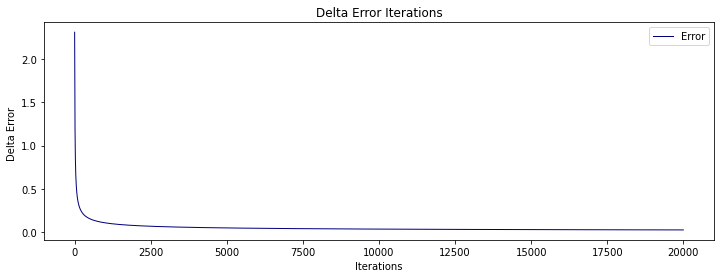

In [7]:
import matplotlib.pyplot as plt

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4

X = [x for x in range(len(plt_error))]
y = plt_error

plt.plot(X,y, color='navy', lw=1, label='Error')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Delta Error ')
plt.title('Delta Error Iterations')
plt.show();

After 5k or k iterations, the improvement is very slow. 